In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]

In [2]:
import os

In [3]:
from darwinian_shift import DarwinianShift, BigwigLookup, hide_top_and_right_axes

In [4]:
plot_dir = "./Transmembrane_figures/"
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Colours
unobserved_colour = '#BBBBBB' 
observed_colour = '#EE7733'

In [5]:
# The bigwig can be downloaded from here http://hgdownload.soe.ucsc.edu/goldenPath/hg19/phyloP100way/
# or by running 
# wget http://hgdownload.soe.ucsc.edu/goldenPath/hg19/phyloP100way/hg19.100way.phyloP100way.bw 
# Warning This file is approx 9Gb.
bw = BigwigLookup("hg19.100way.phyloP100way.bw", name='Phylop score')

In [6]:
transmembrane_section = {
    'transcript_id': 'ENST00000277541', 
        'start': 1736, 'end': 1756
}

In [7]:
data = pd.read_excel("aau3879_TableS2.xlsx", skiprows=17, sheet_name='Mutations_collapsed_by_distance')

In [8]:
d = DarwinianShift(
    data=data, 
    source_genome='grch37',
    lookup=bw,
    included_mutation_types='missense'
)

In [9]:
s = d.run_section(transmembrane_section)

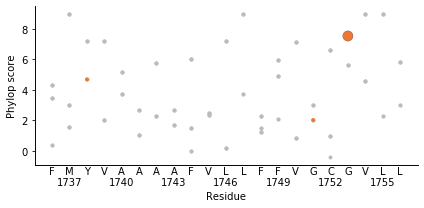

In [10]:
s.plot_scatter(show_residues=True, show_legend=False, figsize=(6, 3),
                    unobserved_mutation_colour=unobserved_colour, missense_mutation_colour=observed_colour,
                    unmutated_marker_size=15, base_marker_size=15)
hide_top_and_right_axes()
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'transmembrane_phylop_scatter.pdf'), transparent=True);

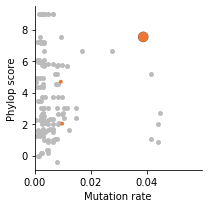

In [11]:
s.plot_mutation_rate_scatter(figsize=(3, 3), show_legend=False,
                            unobserved_mutation_colour=unobserved_colour, missense_mutation_colour=observed_colour,
                            unmutated_marker_size=15, base_marker_size=15)
hide_top_and_right_axes()
plt.title('')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'transmembrane_phylop_vs_mutation_rate.pdf'), transparent=True);